/tmp/ipykernel_158843/844833711.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


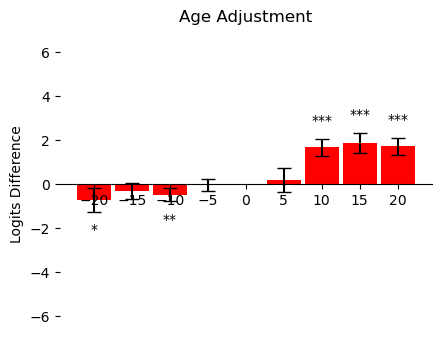

In [3]:
import matplotlib.pyplot as plt
import numpy as np

age_logits = [-0.0585619635, -0.4972086268, -0.3132117692, -0.7236748772, 0.1836919638, 1.660278325, 1.858647081, 1.715143761]
age_diffs = [-5, -10, -15, -20, 5, 10, 15, 20]
age_errs = [1.244521742, 1.318882426, 1.588019376, 2.407769538, 2.47964293, 1.751909599, 2.058746165, 1.780239455]

def getsig(val, err):
    val = np.abs(val)
    err = np.abs(err)
    r = val/err
    if r > 1 and r < 1.5:
        return '*'
    if r >= 1.5 and r < 2:
        return '**'
    if r >= 2:
        return '***'
    return ''

def showfig(logits, diffs, errs, field, color=None):
    fig, ax = plt.subplots(figsize=(0.3+(len(diffs)+1)*0.5,4))

    errs = np.array(errs)/np.sqrt(20)

    kwargs = {}
    if color is not None:
        kwargs = {'color': color}
    p = ax.bar(diffs, logits, width=0.9*(diffs[0]-diffs[1]), yerr=errs, capsize=5, **kwargs)
    ax.bar_label(p, padding=8, labels=[getsig(logits[i], errs[i]) for i in range(len(logits))])
    ax.set_xticks(diffs + [0])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_ylim([-7, 7])
    ax.set_ylabel('Logits Difference')
    ax.set_title(f'{field} Adjustment')
    # ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position('zero')
    
    fig.show()
    name = field.replace(' ', '_')
    fig.savefig(f'/home/anton/Documents/Yale/UKB/Figures/ADRiskAdjustments/{name}.pdf')

showfig(age_logits, age_diffs, age_errs, 'Age', color='red')

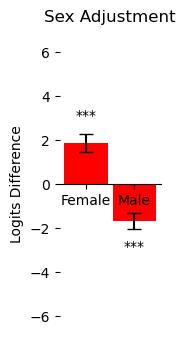

In [62]:
def showfigcat(logits, cats, errs, field, savdir=None, color=None):
    fig, ax = plt.subplots(figsize=(0.3+len(cats)*0.5,4))

    diffs = np.arange(len(cats))
    errs = np.array(errs)/np.sqrt(20)
    
    kwargs = {}
    if color is not None:
        kwargs = {'color': color}
    p = ax.bar(diffs, logits, width=0.9, tick_label=cats, yerr=errs, capsize=5, **kwargs)
    ax.bar_label(p, padding=8, labels=[getsig(logits[i], errs[i]) for i in range(len(logits))])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_ylim([-7, 7])
    ax.set_ylabel('Logits Difference')
    ax.set_title(f'{field} Adjustment')
    # ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position('zero')
    
    fig.show()
    name = field.replace(' ', '_')
    fig.savefig(f'/home/anton/Documents/Yale/UKB/Figures/ADRiskAdjustments/{name}.pdf')

sex_logits = [1.866962152, -1.682636229]
sex_cats = ['Female', 'Male']
sex_errs = [1.845964807, 1.62811871]

showfigcat(sex_logits, sex_cats, sex_errs, 'Sex', color='red')

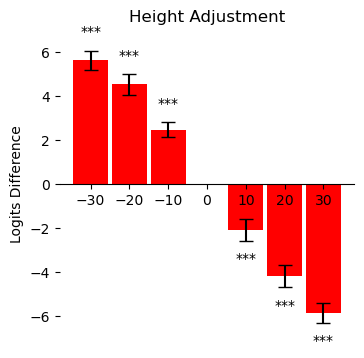

In [63]:
logits = [2.483684975,4.543824714,6.132602312-0.5,-2.067015215,-4.171483859,-6.339841563+0.5]
diffs = [-10,-20,-30,10,20,30]
errs = [1.575243667,2.07786963,1.998672927,2.245756958,2.303119867,2.062967899]

showfig(logits, diffs, errs, 'Height', color='red')

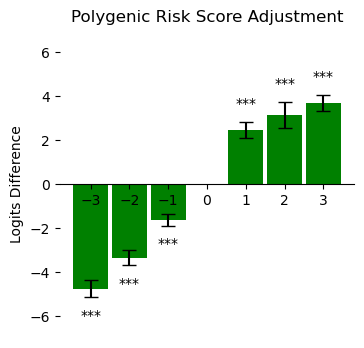

In [64]:
logits = [-1.61505034, -3.345701606, -4.756935011, 2.46562267, 3.143632054, 3.682611028]
diffs = [-1, -2, -3, 1, 2, 3]
errs = [1.219614455, 1.586210073, 1.728175738, 1.62902584, 2.686231092, 1.641217593]

showfig(logits, diffs, errs, 'Polygenic Risk Score', color='green')

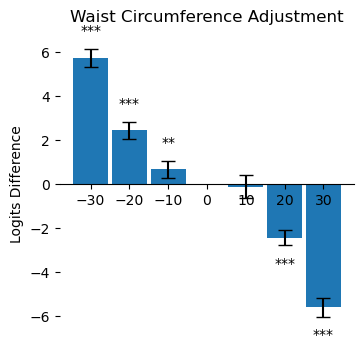

In [65]:
logits = [0.6881050939,2.442096977,5.947946482-0.2,-0.1174212961,-2.428647169,-5.594717483]
diffs = [-10,-20,-30,10,20,30]
errs = [1.734597034,1.755792406,1.803617178,2.299118423,1.578587478,1.95581331]

showfig(logits, diffs, errs, 'Waist Circumference')

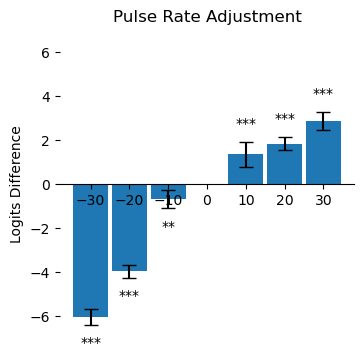

In [66]:
logits = [-0.6813211852, -3.964230029, -6.040338491, 1.371598775, 1.846678578, 2.867275122]
diffs = [-10, -20, -30, 10, 20, 30]
errs = [1.865782701, 1.358683401, 1.573185508, 2.52701408, 1.387459703, 1.826822794]

showfig(logits, diffs, errs, 'Pulse Rate')

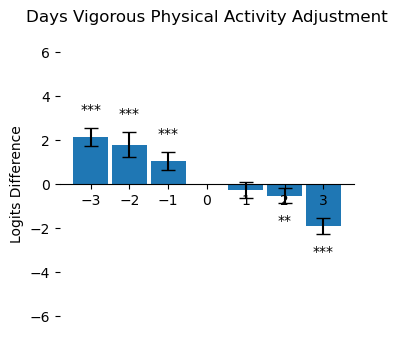

In [67]:
logits = [1.040779311, 1.789925686, 2.132584073, -0.2546186669, -0.5267661783, -1.901659972]
diffs = [-1, -2, -3, 1, 2, 3]
errs = [1.885823098, 2.541681499, 1.913222135, 1.623686256, 1.515752828, 1.619605244]

showfig(logits, diffs, errs, 'Days Vigorous Physical Activity')

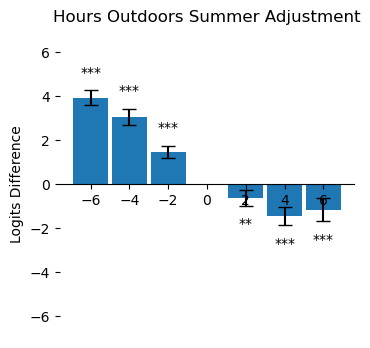

In [68]:
logits = [1.454624248, 3.053450109, 3.925951519, -0.6257455738, -1.453680306, -1.174417982]
diffs = [-2, -4, -6, 2, 4, 6]
errs = [1.317151518, 1.563150567, 1.468958893, 1.652691855, 1.845128453, 2.319452706]

showfig(logits, diffs, errs, 'Hours Outdoors Summer')

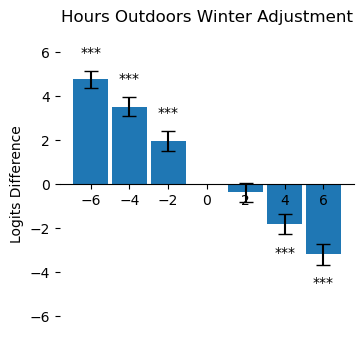

In [69]:
logits = [1.954485699, 3.511046376, 4.753357813, -0.3850856871, -1.811927403, -3.19479313]
diffs = [-2, -4, -6, 2, 4, 6]
errs = [2.059740033, 1.969327309, 1.662317465, 2.015627063, 2.106062886, 2.120223993]

showfig(logits, diffs, errs, 'Hours Outdoors Winter')

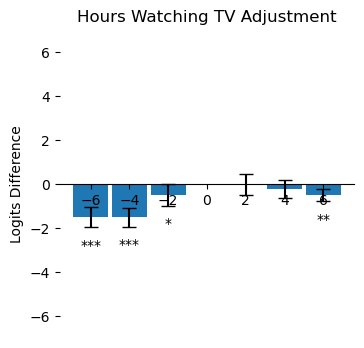

In [70]:
logits = [-0.4933289571, -1.510729594, -1.503646453, -0.01934666059, -0.2369631808, -0.5010409684]
diffs = [-2, -4, -6, 2, 4, 6]
errs = [2.196689806, 1.916974292, 2.049546587, 2.144895487, 1.849010103, 1.316560902]

showfig(logits, diffs, errs, 'Hours Watching TV')

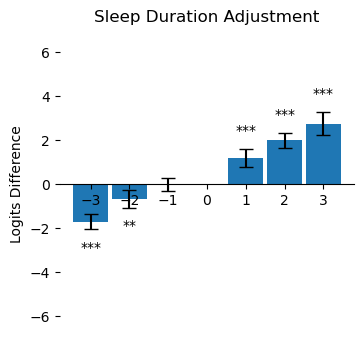

In [71]:
logits = [-0.02086557281, -0.6721377761, -1.708171666, 1.184586321, 1.982054681, 2.744796091]
diffs = [-1, -2, -3, 1, 2, 3]
errs = [1.374820545, 1.827904471, 1.57652263, 1.913075396, 1.56009569, 2.389548968]

showfig(logits, diffs, errs, 'Sleep Duration')

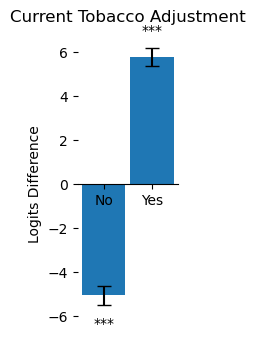

In [72]:
logits = [-5.064090474, 5.855063051-0.1]
cats = ['No', 'Yes']
errs = [1.98841145, 1.844925956]

showfigcat(logits, cats, errs, 'Current Tobacco')

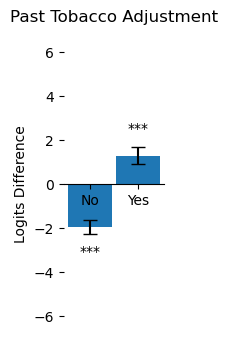

In [73]:
logits = [-1.961072138, 1.287346036]
cats = ['No', 'Yes']
errs = [1.370061552, 1.787814175]

showfigcat(logits, cats, errs, 'Past Tobacco')

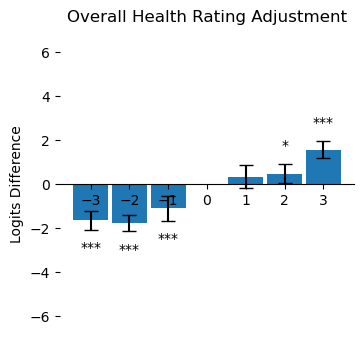

In [74]:
logits = [-1.109661765,-1.783214543,-1.657704656,0.3342725745,0.469111194,1.560672677]
diffs = [-1, -2, -3, 1, 2, 3]
errs = [2.474847167,1.611271373,1.933303437,2.282016156,1.993666716,1.753760729]

showfig(logits, diffs, errs, 'Overall Health Rating')

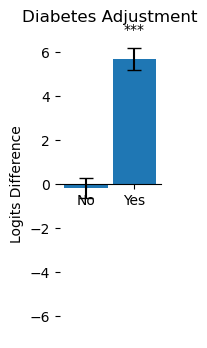

In [75]:
logits = [-0.1930866248,5.979465702-0.3]
cats = ['No', 'Yes']
errs = [2.034448803,2.227680934]

showfigcat(logits, cats, errs, 'Diabetes')

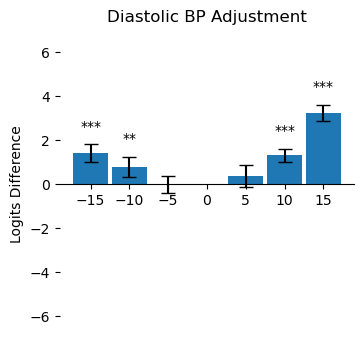

In [76]:
logits = [-0.03175972646,0.7804779131,1.412111734,0.344022068,1.311017587,3.237416955]
diffs = [-5,-10,-15,5,10,15]
errs = [1.689958481,1.990052872,1.745902005,2.239875975,1.342646112,1.615583965]

showfig(logits, diffs, errs, 'Diastolic BP')

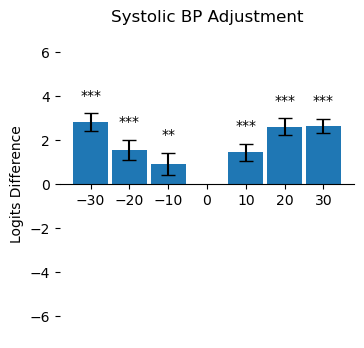

In [77]:
logits = [0.9121143391,1.55797466,2.808985715,1.433575319,2.60996877,2.652377255]
diffs = [-10,-20,-30,10,20,30]
errs = [2.195113818,2.072717625,1.807880256,1.746139401,1.66635852,1.439477472]

showfig(logits, diffs, errs, 'Systolic BP')

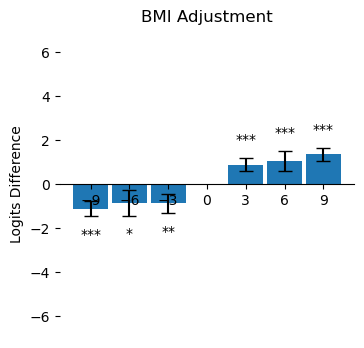

In [78]:
logits = [-0.8800797999,-0.5589051276-0.3,-0.8332998601-0.3,0.8710830308,1.042715691,1.352684206]
diffs = [-3,-6,-9,3,6,9]
errs = [1.989890242,2.572685061,1.511516931,1.34014545,1.997399237,1.362534156]

showfig(logits, diffs, errs, 'BMI')

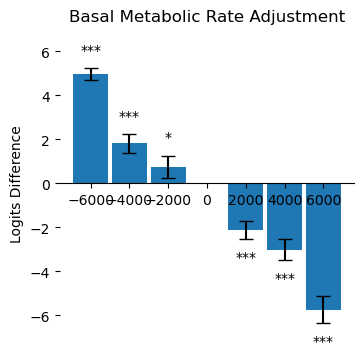

In [79]:
logits = [0.7580297454,1.81568978,4.976352558,-2.125202039,-3.011562035,-6.633351199+0.9]
diffs = [-2000,-4000,-6000,2000,4000,6000]
errs = [2.262556498,1.89725032,1.144069633,1.84168474,2.154885511,2.713789867]

# https://pmc.ncbi.nlm.nih.gov/articles/PMC10195958/
# Causal Relationship Between Basal Metabolic Rate and Alzheimer’s Disease: A Bidirectional Two-sample Mendelian Randomization Study
# BMR, height and weight have a protective effect on AD.

showfig(logits, diffs, errs, 'Basal Metabolic Rate')

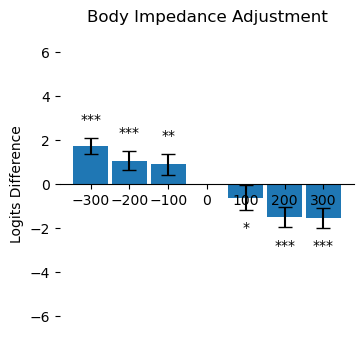

In [80]:
logits = [0.8906296331,1.062694492,1.732736889,-0.6175849924,-1.518994602,-1.528194086]
diffs = [-100,-200,-300,100,200,300]
errs = [2.185720514,1.949082006,1.601186803,2.484735758,2.034296933,2.053945228]

showfig(logits, diffs, errs, 'Body Impedance')

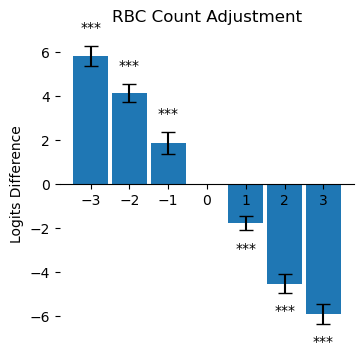

In [81]:
logits = [1.872683261,4.1272164,5.82072674,-1.787882964,-4.525019861,-6.100224572+0.2]
diffs = [-1, -2, -3, 1, 2, 3]
errs = [2.22672959,1.825722641,2.004069696,1.395550491,1.852102013,2.055809881]

showfig(logits, diffs, errs, 'RBC Count')

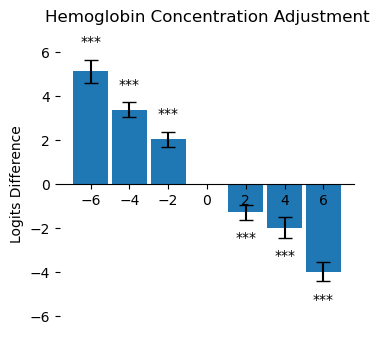

In [82]:
logits = [2.042265004,3.376743373,5.129390035,-1.279574202,-1.982500613,-3.993457834]
diffs = [-2,-4,-6,2,4,6]
errs = [1.525205029,1.504605522,2.310321315,1.536061606,2.064148729,1.929568992]

showfig(logits, diffs, errs, 'Hemoglobin Concentration')

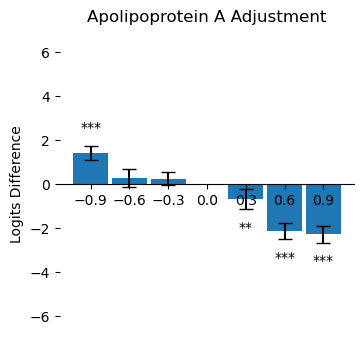

In [83]:
logits = [0.2364212422,0.2662448031,1.405088926,-0.7001289597,-2.140380552,-2.279423416]
diffs = [-0.3,-0.6,-0.9,0.3,0.6,0.9]
errs = [1.348513991,1.894806145,1.494991917,2.046192777,1.703603737,1.701461426]

showfig(logits, diffs, errs, 'Apolipoprotein A')

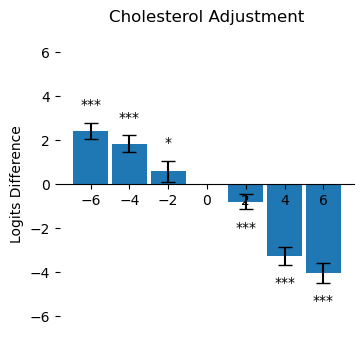

In [84]:
logits = [0.5753625124,1.838179385,2.417184087,-0.8138085952,-3.268922755,-4.033702337]
diffs = [-2,-4,-6,2,4,6]
errs = [2.078190422,1.652308027,1.641648111,1.507214104,1.753879287,2.081471372]

showfig(logits, diffs, errs, 'Cholesterol')

/tmp/ipykernel_158843/844833711.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


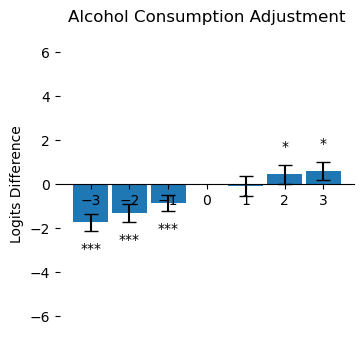

In [2]:
logits = [-0.8558178215,-1.317640046,-1.747903512,-0.09444809633,0.4443532224,0.5824596634]
diffs = [-1,-2,-3,1,2,3]
errs = [1.572112486,1.838628339,1.734390163,1.963808998,1.911880183,1.837218672]

showfig(logits, diffs, errs, 'Alcohol Consumption')

/tmp/ipykernel_158843/844833711.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


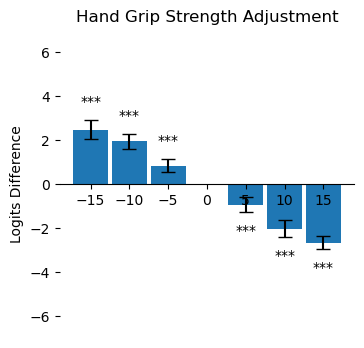

In [4]:
logits = [0.838538022,1.940994102,2.472826667,-0.9423296314,-2.03384766,-2.659778575]
diffs = [-5,-10,-15,5,10,15]
errs = [1.40970348,1.582653104,1.924079647,1.49576923,1.693752049,1.346646302]

showfig(logits, diffs, errs, 'Hand Grip Strength')